In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import sys
sys.path.append('/Users/kaonpark/workspace/github.com/likejazz/kaon-learn')
import kaonlearn
from kaonlearn.plots import plot_decision_regions, plot_history

In [112]:
X_train = np.array([0,1,2,3,5,6,7,8,10,11,12,13,14,15,17,19,20,21,22,23,24,25,26,27,28,29,30])
y_train = np.sin(X_train)

X_test = np.array([4,9,16,18])
y_test = np.sin(X_test)

X_data = np.concatenate((X_train, X_test))
y_data = np.concatenate((y_train, y_test))

# sorting for plot
index = X_data.argsort()
X_data.sort()
y_data = y_data[index[::1]]

In [113]:
X_train.shape

(27,)

In [114]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, SimpleRNN, GRU
from keras.layers.core import Activation, Flatten
from keras.datasets import imdb
from keras_tqdm import TQDMNotebookCallback
from keras.models import Sequential

In [115]:
X_train = X_train.reshape(X_train.shape[0],1,1)
X_test = X_test.reshape(X_test.shape[0],1,1)

X_train.shape, X_test.shape

((27, 1, 1), (4, 1, 1))

In [116]:
X_test.reshape(-1)

array([ 4,  9, 16, 18])

In [117]:
model = Sequential()
# model.add(Dense(1000, input_dim=1, activation='relu'))
model.add(LSTM(10, input_dim=1, input_length=1, return_sequences=True))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(10, return_sequences=True, input_shape=(1, 1))`
  This is separate from the ipykernel package so we can avoid doing imports until


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 1, 10)             480       
_________________________________________________________________
flatten_12 (Flatten)         (None, 10)                0         
_________________________________________________________________
dense_65 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_66 (Dense)             (None, 1)                 11        
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


In [118]:
history = model.fit(X_train, y_train, epochs=100, verbose=0, validation_split=0.1,
                   callbacks=[TQDMNotebookCallback(show_inner=False)])

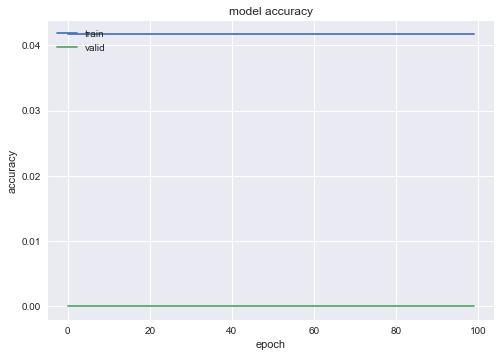

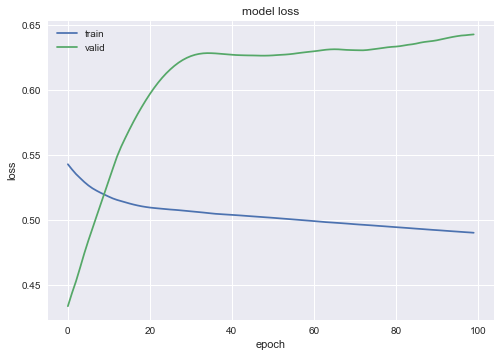

In [119]:
plot_history(history)

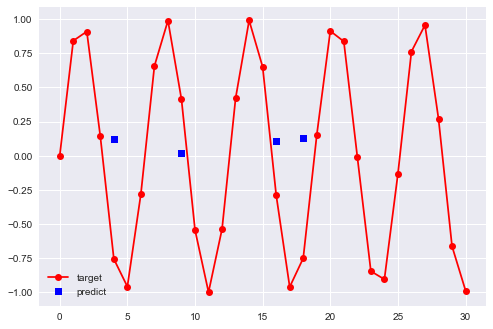

In [120]:
plt.plot(X_data, y_data, 'ro-', label="target")
plt.plot(X_test.reshape(-1), model.predict(X_test), 'bs', label="predict")

plt.legend()
plt.show()